# WATER POTABILITY TEST


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.shape

(3276, 10)

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [10]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [11]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [13]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)

ph
Sulfate
Trihalomethanes


In [14]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mean(), inplace = True)

In [15]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


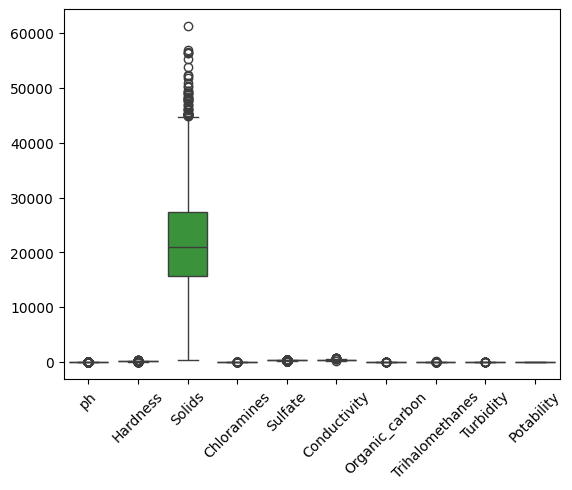

In [18]:
# box_plot
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

# Using IQR, removing outliers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR : \n\n{IQR}')

IQR : 

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [20]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'Lower Bound for outliers : \n\n{lower_bound}\n\n')
print(f'upper Bound for outliers : \n\n{upper_bound}\n\n')

Lower Bound for outliers : 

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64


upper Bound for outliers : 

ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64




In [21]:
df.shape

(3276, 10)

In [26]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [27]:
df.shape

(2666, 10)

# Feature Selection

In [28]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


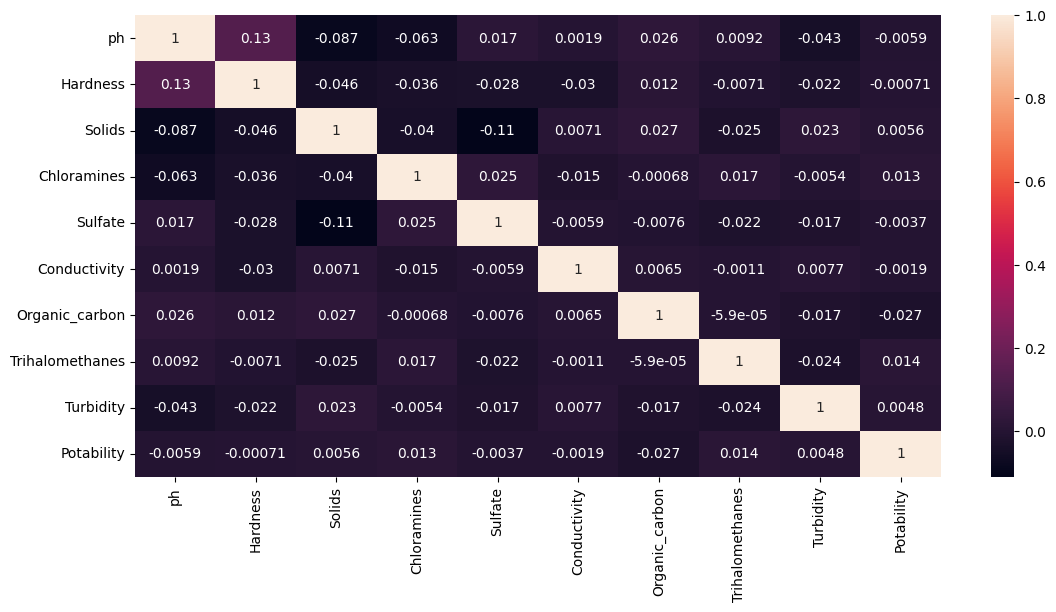

In [30]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
df.corr()['Potability']

ph                -0.005949
Hardness          -0.000710
Solids             0.005600
Chloramines        0.013195
Sulfate           -0.003741
Conductivity      -0.001886
Organic_carbon    -0.027090
Trihalomethanes    0.014351
Turbidity          0.004761
Potability         1.000000
Name: Potability, dtype: float64

# Model Building

In [34]:
x = df.drop(columns=['Potability'],axis=1)
y = df['Potability']

In [35]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [36]:
y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [38]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902
1173,6.320428,210.310043,11682.229317,6.968423,311.777822,375.964558,11.973422,62.960463,4.553381
1981,7.080795,209.751955,20214.216552,6.045078,323.788383,539.464723,20.278990,72.735207,4.258489
...,...,...,...,...,...,...,...,...,...
2003,7.880686,226.003844,19486.881839,6.208574,356.338079,472.369094,11.995239,55.029166,3.579984
1338,5.506062,164.496172,21543.726601,5.983996,333.775777,453.883340,13.339716,55.751362,2.778906
1378,7.499844,210.985034,23707.465304,7.148518,333.775777,484.843340,18.081957,52.967469,4.454477
1583,7.736313,225.063103,19496.848592,7.158343,289.945985,433.974022,15.153817,74.765101,3.700917


In [39]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2553,8.037761,199.213971,40368.420627,7.307411,333.775777,293.833466,14.254682,68.763418,3.572519
2347,5.429335,183.439383,15265.407564,5.714731,394.001195,446.879149,17.581557,50.266951,3.081736
605,6.492639,172.863960,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770
2323,5.277876,166.733007,18404.050689,4.777124,333.775777,347.219457,15.526043,63.008668,3.632607
912,8.274069,195.803331,18091.202615,7.422104,365.407222,369.198334,16.996330,66.396293,2.575423
...,...,...,...,...,...,...,...,...,...
1459,6.867001,184.248496,14464.115547,6.759352,371.283819,497.703775,14.782861,73.433479,3.484121
1170,6.770927,181.818066,26880.220040,5.215862,284.745510,475.548960,14.665441,60.515772,4.910534
1044,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
1855,7.532059,185.506563,24454.725864,5.791102,333.775777,393.971890,15.070248,74.780643,3.808570


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [42]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902
1173,6.320428,210.310043,11682.229317,6.968423,311.777822,375.964558,11.973422,62.960463,4.553381
1981,7.080795,209.751955,20214.216552,6.045078,323.788383,539.464723,20.278990,72.735207,4.258489
...,...,...,...,...,...,...,...,...,...
2003,7.880686,226.003844,19486.881839,6.208574,356.338079,472.369094,11.995239,55.029166,3.579984
1338,5.506062,164.496172,21543.726601,5.983996,333.775777,453.883340,13.339716,55.751362,2.778906
1378,7.499844,210.985034,23707.465304,7.148518,333.775777,484.843340,18.081957,52.967469,4.454477
1583,7.736313,225.063103,19496.848592,7.158343,289.945985,433.974022,15.153817,74.765101,3.700917


In [43]:
x_train_sc

array([[ 1.08790956,  2.09056478, -0.59647931, ..., -1.05584236,
        -0.76370666, -0.13696497],
       [-1.74032936, -1.54115475, -0.18021947, ..., -0.74586468,
         0.12902908, -0.11598472],
       [ 0.0119423 , -1.41562152,  0.19157245, ...,  1.52916801,
         1.0208548 ,  2.11818687],
       ...,
       [ 0.35677911,  0.49545104,  0.26969765, ...,  1.1716937 ,
        -0.91406427,  0.65386741],
       [ 0.55136958,  0.99173017, -0.2579827 , ...,  0.27335131,
         0.56043327, -0.33985365],
       [ 0.0119423 ,  2.10605667, -1.585393  , ...,  0.79325653,
         0.41990686, -0.77401858]], shape=(2132, 9))

In [44]:
x_test_sc

array([[ 0.79943193,  0.08049832,  2.35767176, ..., -0.00249991,
         0.15445038, -0.50917191],
       [-1.347047  , -0.47558639, -0.78827278, ...,  1.01817311,
        -1.0967404 , -1.15636853],
       [-0.47205211, -0.84839046, -0.8684592 , ..., -1.24276197,
        -0.64468521,  0.93513795],
       ...,
       [-1.43720887,  0.25633853,  0.10469076, ..., -0.08858617,
         1.12816951, -1.36209116],
       [ 0.38328836, -0.40271429,  0.36334538, ...,  0.2477127 ,
         0.56148464, -0.1978911 ],
       [ 0.29361634,  0.46235523,  1.19276064, ...,  0.78023198,
        -1.68248013, -0.32433874]], shape=(534, 9))

# Model Selection

In [45]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
print(f'Training Acurracy : {round(lr.score(x_train_sc,y_train),2)*100}%')
print(f'Test Acurracy : {round(lr.score(x_test_sc,y_test),2)*100}%')

Training Acurracy : 62.0%
Test Acurracy : 64.0%


# Decision Tree

In [47]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
print(f'Training Acurracy : {round(dtree.score(x_train_sc,y_train),2)*100}%')
print(f'Test Acurracy : {round(dtree.score(x_test_sc,y_test),2)*100}%')

Training Acurracy : 72.0%
Test Acurracy : 63.0%


# Model Training decision Tree

In [49]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
y_pred_train = dtree.predict(x_train_sc)
y_pred_test = dtree.predict(x_test_sc)

In [51]:
x_train[:3]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902


In [52]:
y_train[:3]

2271    0
2748    1
3106    0
Name: Potability, dtype: int64

In [53]:
y_pred_train[:3]

array([0, 1, 0])

# Model Evaluation

In [54]:
confusion_matrix(y_train,y_pred_train)

array([[1193,  136],
       [ 511,  292]])

<Axes: >

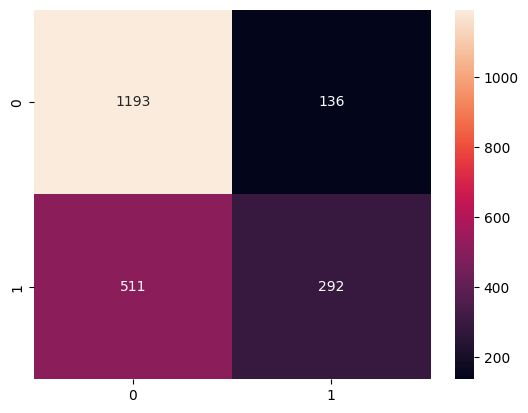

In [55]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True , fmt='.4g')

In [56]:
accuracy_score(y_train,y_pred_train)

0.6965290806754222

In [57]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79      1329
           1       0.68      0.36      0.47       803

    accuracy                           0.70      2132
   macro avg       0.69      0.63      0.63      2132
weighted avg       0.69      0.70      0.67      2132



In [58]:
confusion_matrix(y_test,y_pred_test)

array([[288,  54],
       [143,  49]])

<Axes: >

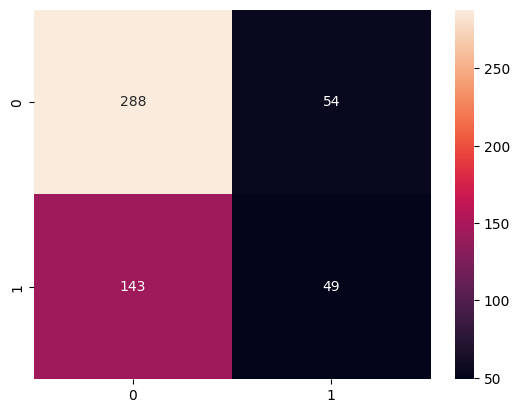

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt = '.3g')

In [61]:
accuracy_score(y_test,y_pred_test)

0.6310861423220974

In [62]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       342
           1       0.48      0.26      0.33       192

    accuracy                           0.63       534
   macro avg       0.57      0.55      0.54       534
weighted avg       0.60      0.63      0.60       534

